# Extract and Visualize Individual Heartbeats

This example can be referenced by [citing the package](https://neuropsychology.github.io/NeuroKit/cite_us.html).

This example shows how to use NeuroKit to extract and visualize the QRS complexes (individual heartbeats) from an electrocardiogram (ECG).


In [2]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

## Extract the cleaned ECG signal

In this example, we will use a simulated ECG signal. However, you can use any of your signal (for instance, extracted from the dataframe using the [read_acqknowledge()](https://neuropsychology.github.io/NeuroKit/functions/data.html#read-acqknowledge).


In [3]:
# Simulate 30 seconds of ECG Signal (recorded at 250 samples / second)
ecg_signal = nk.ecg_simulate(duration=30, sampling_rate=250)


Once you have a raw ECG signal in the shape of a vector (i.e., a one-dimensional array), or a list, you can use [ecg_process()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-process) to process it.

*Note: It is critical that you specify the correct sampling rate of your signal throughout many processing functions, as this allows NeuroKit to have a time reference.*

In [5]:
# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(ecg_signal, sampling_rate=250)

This function outputs two elements, a *dataframe* containing the different signals (raw, cleaned, etc.) and a *dictionary* containing various additional information (peaks location, ...).

## Extract R-peaks location


The processing function does two important things for our purpose: 1) it cleans the signal and 2) it detects the location of the R-peaks. Let's extract these from the output.


In [6]:
# Extract clean ECG and R-peaks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

Great. We can visualize the R-peaks location in the signal to make sure it got detected correctly by marking their location in the signal.

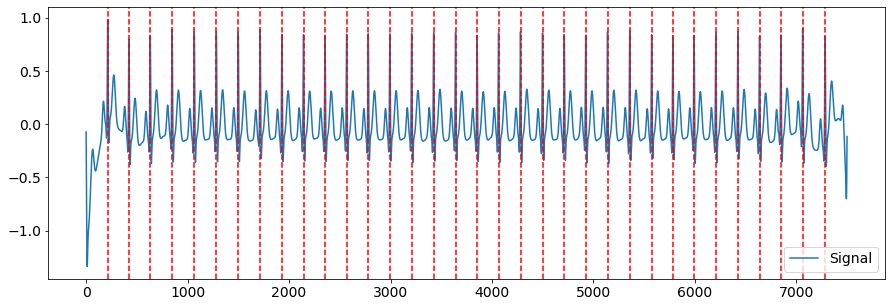

In [29]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks, cleaned_ecg)


Once that we know where the R-peaks are located, we can create windows of signal around them (of a length of for instance 1 second, ranging from 400 ms before the R-peak), which we can refer to as *epochs*.


## Segment the signal around the heart beats


You can now epoch all these individual heart beats, synchronized by their R peaks with the [ecg_segment()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-segment) function.


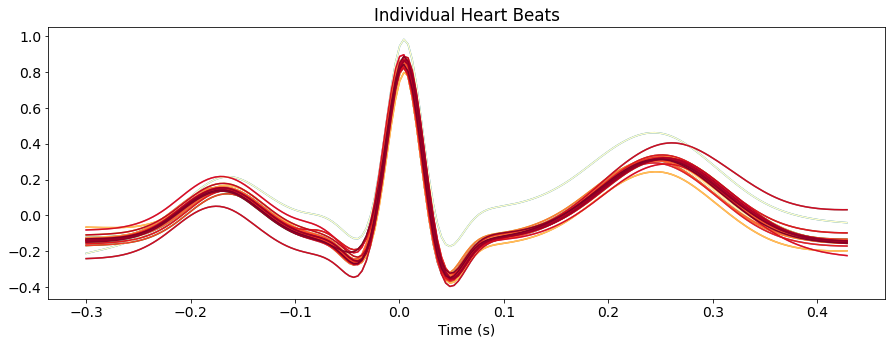

In [30]:
# Plotting all the heart beats
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=250, show=True)


This create a dictionary of dataframes for each 'epoch' (in this case, each heart beat).
    

## Advanced Plotting

This section is written for a more advanced purpose of plotting and visualizing all the heartbeats segments. The code below uses packages other than *NeuroKit2* to manually set the colour gradient of the signals and to create a more interactive experience for the user - by hovering your cursor over each signal, an annotation of the signal corresponding to the heart beat index is shown.

### Custom colors and legend

Here, we define a function to create the epochs. It takes in `cleaned` as the cleaned signal dataframe, and `peaks` as the array of R-peaks locations.

In [20]:
# Define a function to create epochs
def extract_heartbeats(cleaned, peaks, sampling_rate=None): 
    heartbeats = nk.epochs_create(cleaned, 
                                  events=peaks, 
                                  epochs_start=-0.3, 
                                  epochs_end=0.4, 
                                  sampling_rate=sampling_rate)
    heartbeats = nk.epochs_to_df(heartbeats)
    return heartbeats
    
heartbeats = extract_heartbeats(cleaned_ecg, peaks=rpeaks, sampling_rate=250)
heartbeats.head()

,Signal,Index,Label,Time
0,-0.208551,137,1,-0.300000
1,-0.203352,138,1,-0.295977
2,-0.198121,139,1,-0.291954
3,-0.192803,140,1,-0.287931
4,-0.187326,141,1,-0.283908


We then pivot the dataframe so that each column corresponds to the signal values of one channel, or *Label*.

In [21]:
heartbeats_pivoted = heartbeats.pivot(index='Time', columns='Label', values='Signal')
heartbeats_pivoted.head()

Label,1,10,11,12,13,14,15,16,17,18,...,31,32,33,34,4,5,6,7,8,9
Time,,,,,,,,,,,,,,,,,,,,,
-0.300000,-0.208551,-0.140671,-0.136002,-0.131516,-0.139219,-0.137384,-0.136880,-0.131079,-0.136135,-0.151102,...,-0.130606,-0.160349,-0.043917,-0.335574,-0.119478,-0.142621,-0.135635,-0.154164,-0.139989,-0.144426
-0.295977,-0.203352,-0.139898,-0.135130,-0.130562,-0.138068,-0.136738,-0.136289,-0.129969,-0.134923,-0.150204,...,-0.129455,-0.159751,-0.043209,-0.334929,-0.118750,-0.141651,-0.134844,-0.153459,-0.139010,-0.142736
-0.291954,-0.198121,-0.138973,-0.134159,-0.129480,-0.136695,-0.135954,-0.135656,-0.128744,-0.133525,-0.149066,...,-0.128252,-0.159033,-0.042322,-0.334110,-0.117813,-0.140513,-0.133946,-0.152612,-0.137828,-0.140801
-0.287931,-0.192803,-0.137845,-0.133073,-0.128220,-0.135044,-0.134998,-0.134946,-0.127369,-0.131894,-0.147631,...,-0.126956,-0.158161,-0.041228,-0.333076,-0.116634,-0.139174,-0.132920,-0.151574,-0.136366,-0.138565
-0.283908,-0.187326,-0.136455,-0.131844,-0.126724,-0.133049,-0.133837,-0.134109,-0.125800,-0.129975,-0.145817,...,-0.125507,-0.157083,-0.039889,-0.331769,-0.115169,-0.137602,-0.131732,-0.150282,-0.134538,-0.135961


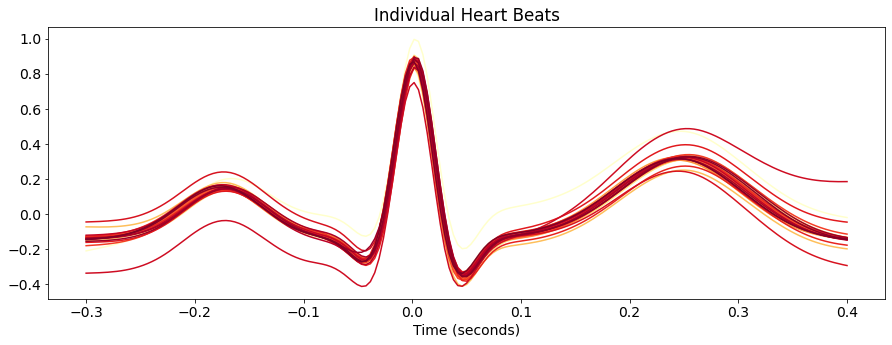

In [22]:
# Prepare figure
fig, ax = plt.subplots()

ax.set_title("Individual Heart Beats")
ax.set_xlabel("Time (seconds)")

# Aesthetics
labels = list(heartbeats_pivoted)
labels = ['Channel ' + x for x in labels] # Set labels for each signal
cmap = iter(plt.cm.YlOrRd(np.linspace(0,1, int(heartbeats["Label"].nunique())))) # Get color map
lines = [] # Create empty list to contain the plot of each signal

for i, x, color in zip(labels, heartbeats_pivoted, cmap):
    line, = ax.plot(heartbeats_pivoted[x], label='%s' % i, color=color)
    lines.append(line)

In [31]:
def get_intervals(A, B, remove_nan=False):
        if remove_nan:
            return [(int(start), int(end)) for start, end in zip(A, B) if not math.isnan(start) and not math.isnan(end)]
        return [(int(start), int(end)) if not math.isnan(start) and not math.isnan(end) else (-1, -1) for start, end in
                zip(A, B)]

def extract(ecg_signal):
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=128, method="neurokit")
    # R-peaks
    # 'pamtompkins1985', 'hamilton2002', 'christov2004', 'gamboa2008', 'elgendi2010', 'engzeemod2012' ,'kalidas2017'
    processed_data, rpeaks, = nk.ecg_peaks(
        ecg_cleaned=ecg_cleaned, sampling_rate=128, method="kalidas2017", correct_artifacts=True
    )
    rpeaks = processed_data[processed_data["ECG_R_Peaks"] == 1].index.values
    # rpeaks = rpeaks["ECG_R_Peaks"]

    rate = nk.signal_rate(rpeaks, sampling_rate=128, desired_length=len(ecg_cleaned))

    processed_data["ECG_Rate"] = rate

    _, waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=128, method="dwt", show_type='all')

    p_peaks = np.array(waves_peak["ECG_P_Peaks"])
    p_onset = np.array(waves_peak["ECG_P_Onsets"])
    p_offset = np.array(waves_peak["ECG_P_Offsets"])

    r_onset = np.array(waves_peak["ECG_R_Onsets"])
    r_offset = np.array(waves_peak["ECG_R_Offsets"])

    t_peaks = np.array(waves_peak["ECG_T_Peaks"])
    t_onset = np.array(waves_peak["ECG_T_Onsets"])
    t_offset = np.array(waves_peak["ECG_T_Offsets"])

    segments = {}
    # segments["beat"] = t_offset - p_onset
    # segments["qt"] = t_offset - p_offset
    # segments["tq"] = p_offset[1:] - t_offset[:-1]
    # segments["qrs"] = r_offset - r_onset
    # segments["pr"] = r_onset - p_onset
    # segments["p"] = p_offset - p_onset
    # segments["t"] = t_offset - t_onset
    # segments["st"] = t_offset - r_offset
    # segments["rt"] = t_peaks - rpeaks

    segments["beat"] = t_offset - p_onset
    segments["qtend"] = t_offset - r_onset
    segments["tendq"] = r_onset[1:] - t_offset[:-1]
    segments["qrs"] = r_offset - r_onset
    segments["pr"] = r_onset - p_onset
    segments["p"] = p_offset - p_onset
    segments["t"] = t_offset - t_onset
    segments["st"] = t_onset - r_offset
    segments["qtpico"] = t_peaks - rpeaks
    segments["tpicoq"] = rpeaks[1:] - t_peaks[:-1]

    # ecg_delineate
    # rr_intervals_list contains integer values of RR-interval
    rr_intervals_list = rpeaks[1:] - rpeaks[:-1]
    rr_intervals_list = rr_intervals_list * (1000 / 128)
    segments['rr'] = rr_intervals_list

    # Duration
    for key in segments.keys():
        if key != "tendq" and key != "rr" and key != "tpicoq":
            segments[key] = segments[key][:-1]

    durations = [np.array(x).reshape(-1, 1) for x in segments.values()]
    durations = np.concatenate(durations, axis=1)
    durations = pd.DataFrame(data=durations, columns=["duration_" + col for col in segments.keys()])

    # peaks
    list_peaks = {"p": p_peaks, 'r': rpeaks, 't': t_peaks}
    list_peaks = {'r': rpeaks, 't': t_peaks}

    for key in list_peaks.keys():
        list_peaks[key] = list_peaks[key][:-1]

    peaks_values = [np.array(x).reshape(-1, 1) for x in list_peaks.values()]
    peaks_values = np.concatenate(peaks_values, axis=1)
    peaks_values = pd.DataFrame(data=peaks_values, columns=["peaks_" + col for col in list_peaks.keys()])
    peaks_values = peaks_values.fillna(0).astype(int)
    peaks_values = peaks_values.applymap(lambda x: ecg_cleaned[int(x)] if x != 0 else np.nan)

    # Amplituds for segments
    p_segments = get_intervals(p_onset, p_offset)
    t_segments = get_intervals(t_onset, t_offset)
    st_segments = get_intervals(r_offset, t_offset)
    qrs_segments = get_intervals(r_onset, r_offset)
    pqrs_segments = get_intervals(p_onset, t_offset)

    list_segments = {"t": t_segments, "p": p_segments, "wt": st_segments, 'qrs': qrs_segments, 'pqrs': pqrs_segments}
    list_segments = {"t": t_segments, 'qrs': qrs_segments}

    segments_extraction = []
    for key in list_segments.keys():
        if key != "tendq" and key != "rr" and key != "tpicoq":
            list_segments[key] = list_segments[key][:-1]

        results = [np.mean(ecg_cleaned[start:end]) if start != -1 else np.nan for start, end in list_segments[key]]
        segments_extraction.append(np.array(results).reshape(-1, 1))
    amplitudes = np.concatenate(segments_extraction, axis=1)
    amplitudes = pd.DataFrame(data=amplitudes, columns=["mean_" + col for col in list_segments.keys()])

    results = pd.concat([amplitudes, durations, peaks_values], axis=1)
    return results

In [ ]:
def get_intervals(A, B, remove_nan=False):
        if remove_nan:
            return [(int(start), int(end)) for start, end in zip(A, B) if not math.isnan(start) and not math.isnan(end)]
        return [(int(start), int(end)) if not math.isnan(start) and not math.isnan(end) else (-1, -1) for start, end in
                zip(A, B)]

In [ ]:
def extract(ecg_signal):
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=128, method="neurokit")
    # R-peaks
    # 'pamtompkins1985', 'hamilton2002', 'christov2004', 'gamboa2008', 'elgendi2010', 'engzeemod2012' ,'kalidas2017'
    processed_data, rpeaks, = nk.ecg_peaks(
        ecg_cleaned=ecg_cleaned, sampling_rate=128, method="kalidas2017", correct_artifacts=True
    )
    rpeaks = processed_data[processed_data["ECG_R_Peaks"] == 1].index.values
    # rpeaks = rpeaks["ECG_R_Peaks"]

    rate = nk.signal_rate(rpeaks, sampling_rate=128, desired_length=len(ecg_cleaned))

    processed_data["ECG_Rate"] = rate

    _, waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=128, method="dwt", show_type='all')

    p_peaks = np.array(waves_peak["ECG_P_Peaks"])
    p_onset = np.array(waves_peak["ECG_P_Onsets"])
    p_offset = np.array(waves_peak["ECG_P_Offsets"])

    r_onset = np.array(waves_peak["ECG_R_Onsets"])
    r_offset = np.array(waves_peak["ECG_R_Offsets"])

    t_peaks = np.array(waves_peak["ECG_T_Peaks"])
    t_onset = np.array(waves_peak["ECG_T_Onsets"])
    t_offset = np.array(waves_peak["ECG_T_Offsets"])

   

In [ ]:
# def extract
 segments = {}
    segments["beat"] = t_offset - p_onset
    segments["qtend"] = t_offset - r_onset
    segments["tendq"] = r_onset[1:] - t_offset[:-1]
    segments["qrs"] = r_offset - r_onset
    segments["pr"] = r_onset - p_onset
    segments["p"] = p_offset - p_onset
    segments["t"] = t_offset - t_onset
    segments["st"] = t_onset - r_offset
    segments["qtpico"] = t_peaks - rpeaks
    segments["tpicoq"] = rpeaks[1:] - t_peaks[:-1]

    # ecg_delineate
    # rr_intervals_list contains integer values of RR-interval
    rr_intervals_list = rpeaks[1:] - rpeaks[:-1]
    rr_intervals_list = rr_intervals_list * (1000 / 128)
    segments['rr'] = rr_intervals_list

    # Duration
    for key in segments.keys():
        if key != "tendq" and key != "rr" and key != "tpicoq":
            segments[key] = segments[key][:-1]

    durations = [np.array(x).reshape(-1, 1) for x in segments.values()]
    durations = np.concatenate(durations, axis=1)
    durations = pd.DataFrame(data=durations, columns=["duration_" + col for col in segments.keys()])

    # peaks
    list_peaks = {"p": p_peaks, 'r': rpeaks, 't': t_peaks}
    list_peaks = {'r': rpeaks, 't': t_peaks}



In [ ]:
# def extract
    for key in list_peaks.keys():
        list_peaks[key] = list_peaks[key][:-1]

    peaks_values = [np.array(x).reshape(-1, 1) for x in list_peaks.values()]
    peaks_values = np.concatenate(peaks_values, axis=1)
    peaks_values = pd.DataFrame(data=peaks_values, columns=["peaks_" + col for col in list_peaks.keys()])
    peaks_values = peaks_values.fillna(0).astype(int)
    peaks_values = peaks_values.applymap(lambda x: ecg_cleaned[int(x)] if x != 0 else np.nan)
    # Amplituds for segments
    p_segments = get_intervals(p_onset, p_offset)
    t_segments = get_intervals(t_onset, t_offset)
    st_segments = get_intervals(r_offset, t_offset)
    qrs_segments = get_intervals(r_onset, r_offset)
    pqrs_segments = get_intervals(p_onset, t_offset)

    list_segments = {"t": t_segments, "p": p_segments, "wt": st_segments, 'qrs': qrs_segments, 'pqrs': pqrs_segments}
    list_segments = {"t": t_segments, 'qrs': qrs_segments}

    segments_extraction = []
    for key in list_segments.keys():
        if key != "tendq" and key != "rr" and key != "tpicoq":
            list_segments[key] = list_segments[key][:-1]

        results = [np.mean(ecg_cleaned[start:end]) if start != -1 else np.nan for start, end in list_segments[key]]
        segments_extraction.append(np.array(results).reshape(-1, 1))
    amplitudes = np.concatenate(segments_extraction, axis=1)
    amplitudes = pd.DataFrame(data=amplitudes, columns=["mean_" + col for col in list_segments.keys()])

    results = pd.concat([amplitudes, durations, peaks_values], axis=1)
    return results

In [37]:
import math

In [33]:
cleaned_ecg.values

array([-0.07273979, -0.19564196, -0.33135259, ..., -0.40889182,
       -0.26853457, -0.11569566])

In [38]:
extract(cleaned_ecg)

,mean_t,mean_qrs,duration_beat,duration_qtend,duration_tendq,duration_qrs,duration_pr,duration_p,duration_t,duration_st,duration_qtpico,duration_tpicoq,duration_rr,peaks_r,peaks_t
0,0.344586,-0.082382,70.0,29.0,182.0,19.0,41.0,49.0,16.0,-6.0,8.0,201.0,1632.8125,-0.223715,0.745956
1,0.353604,-0.048363,71.0,28.0,180.0,17.0,43.0,50.0,17.0,-6.0,9.0,201.0,1640.6250,-0.187441,0.818042
2,0.353653,-0.058009,71.0,30.0,186.0,19.0,41.0,49.0,17.0,-6.0,9.0,206.0,1679.6875,-0.187703,0.824213
3,0.374949,-0.032798,73.0,29.0,190.0,19.0,44.0,52.0,17.0,-7.0,9.0,209.0,1703.1250,-0.206872,0.845470
4,0.374095,-0.066137,74.0,29.0,189.0,18.0,45.0,52.0,17.0,-6.0,10.0,208.0,1703.1250,-0.243972,0.848991
5,0.373065,-0.032208,73.0,28.0,187.0,18.0,45.0,41.0,17.0,-7.0,9.0,207.0,1687.5000,-0.212966,0.841108
6,0.370359,-0.067274,73.0,29.0,165.0,18.0,44.0,41.0,17.0,-6.0,9.0,215.0,1750.0000,-0.200205,0.841261
7,0.122261,0.026287,156.0,134.0,103.0,61.0,22.0,41.0,57.0,16.0,62.0,147.0,1632.8125,0.823580,0.293566
8,0.130724,-0.061279,155.0,111.0,101.0,18.0,44.0,51.0,57.0,36.0,68.0,142.0,1640.6250,-0.004268,0.307466
9,0.352390,-0.044560,72.0,29.0,184.0,19.0,43.0,39.0,17.0,-7.0,9.0,212.0,1726.5625,-0.222059,0.813991


In [ ]:
jupyter nbconvert ecg_heartbeats.ipynb --to slides --post serve